# MNIST GAN 0.3d

Experimenting with unmixed minibatches, i.e. training the discriminator on mini batches which are either entirely real and entirely fake.

In [1]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session

import pickle

In [2]:
mnist_ex.preprocess_real(save_only=True)
real_train, real_test = pickle.load(open("mnist_train_tuple.p", "rb"))
real_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 32, 32, 1)

In [8]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [9]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, 
                latent_dims=50, verbose=True, lr=2e-4)

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               26112     
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
reshape (Reshape)            (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 64)          204864    
_________________________________________________________________
batch_normalization_5 (Batch (None, 4, 4, 64)          256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 4, 4, 64)          0 

In [11]:
model.train(real_train, num_epochs=30, batch_size=30)

KeyboardInterrupt: ignored

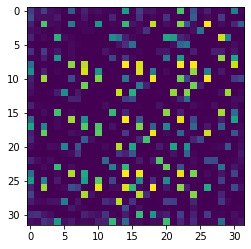

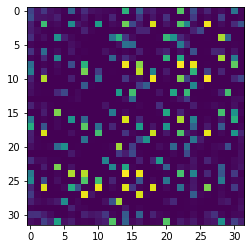

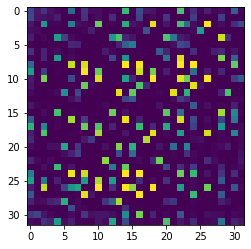

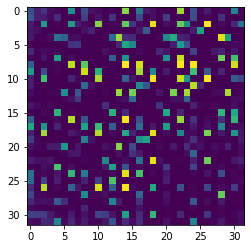

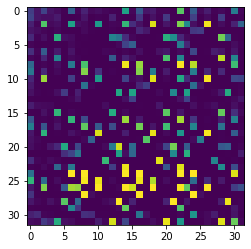

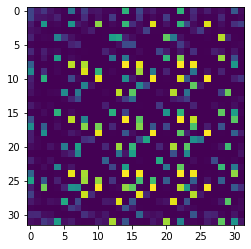

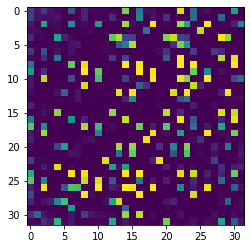

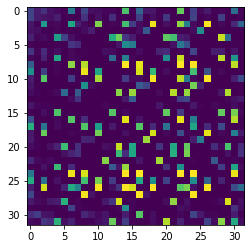

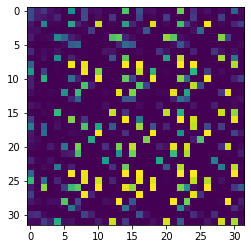

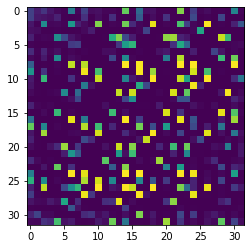

In [12]:
for _ in range(10):
  fake_img = model.generator.predict(np.random.randn(1, 50))
  plt.imshow(fake_img.reshape(32, 32))
  plt.show()

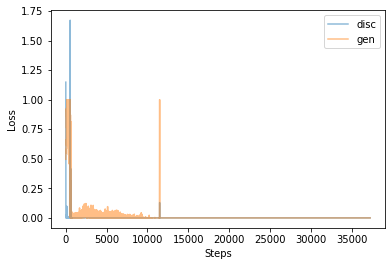

In [13]:
plt.xlabel("Steps")
plt.ylabel("Loss")

plt.plot(model.history.disc_loss, label="disc", alpha=0.5)
plt.plot(model.history.gen_loss, label="gen", alpha=0.5)
plt.legend()
plt.show()

In [14]:
!zip -r /content/temp_file.zip /content/Training_Runs
files.download("/content/temp_file.zip")

  adding: content/Training_Runs/ (stored 0%)
  adding: content/Training_Runs/.ipynb_checkpoints/ (stored 0%)
  adding: content/Training_Runs/162bd245-f87e-4b00-af70-5d1baeb8fa7c/ (stored 0%)
  adding: content/Training_Runs/162bd245-f87e-4b00-af70-5d1baeb8fa7c/img_epoch5.png (deflated 14%)
  adding: content/Training_Runs/162bd245-f87e-4b00-af70-5d1baeb8fa7c/img_epoch4.png (deflated 14%)
  adding: content/Training_Runs/162bd245-f87e-4b00-af70-5d1baeb8fa7c/img_epoch13.png (deflated 14%)
  adding: content/Training_Runs/162bd245-f87e-4b00-af70-5d1baeb8fa7c/img_epoch8.png (deflated 15%)
  adding: content/Training_Runs/162bd245-f87e-4b00-af70-5d1baeb8fa7c/img_epoch6.png (deflated 14%)
  adding: content/Training_Runs/162bd245-f87e-4b00-af70-5d1baeb8fa7c/img_epoch12.png (deflated 14%)
  adding: content/Training_Runs/162bd245-f87e-4b00-af70-5d1baeb8fa7c/img_epoch9.png (deflated 15%)
  adding: content/Training_Runs/162bd245-f87e-4b00-af70-5d1baeb8fa7c/img_epoch14.png (deflated 14%)
  adding: cont

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>